# Conditional Image Generation

GANs are trained in a completely unsupervised and uncondional method. What if we want to generate a specfic type of image from the generator? Conditional GANs are those Generative Adversarial Networks (GANs) where we condition the generator on something during the generation process.

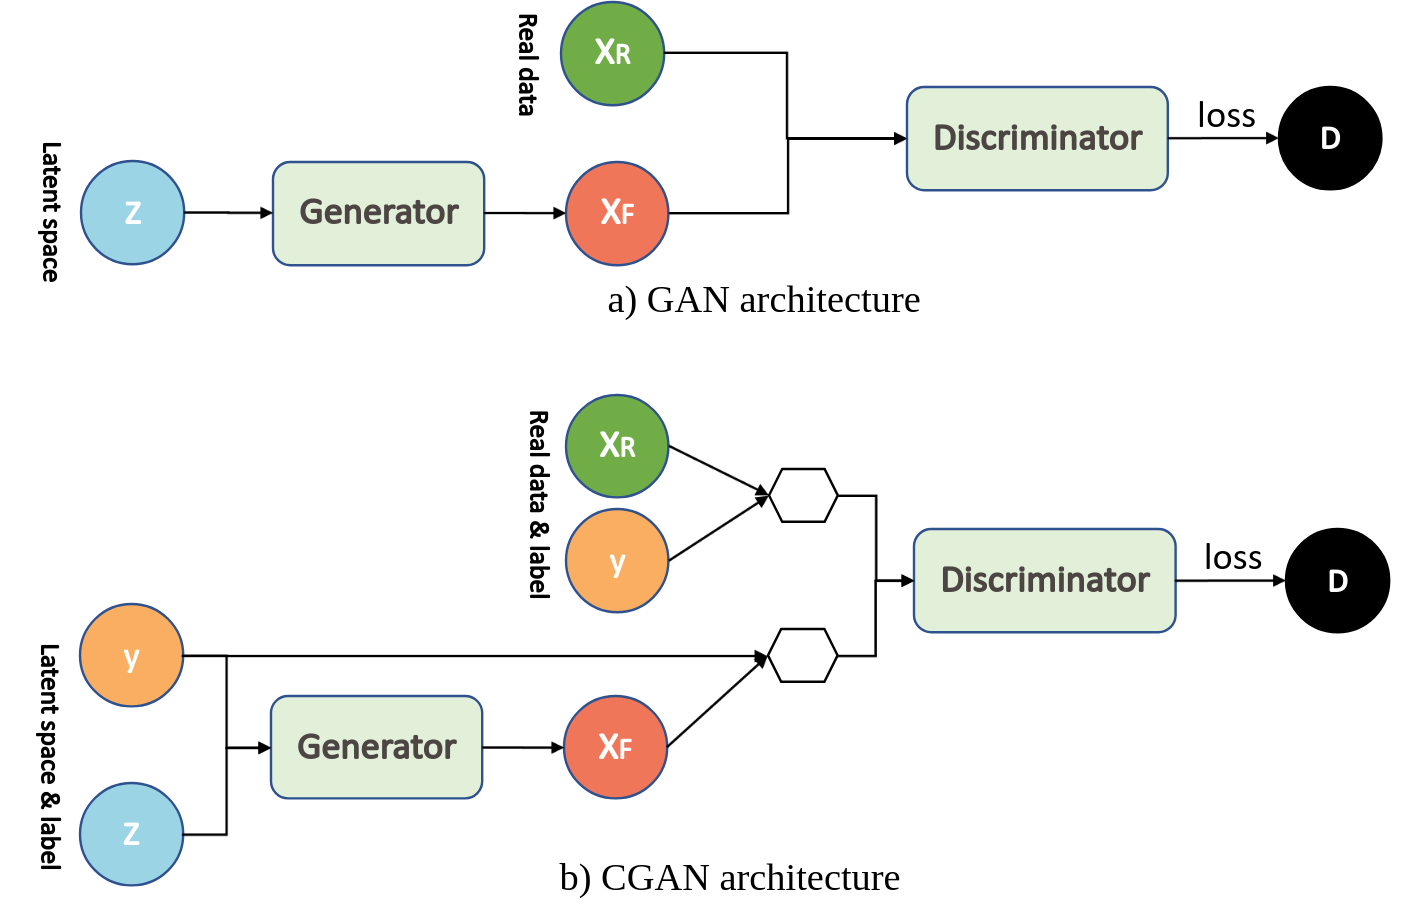

<p align = "center">
Fig.1 - GAN vs. CGAN 
(<a href="https://itchef.ru/articles/341494/">
source
</a>)
</p>

In this tutorial, you will create and train a Conditional GAN on ciphar-10 dataset

Make sure to show the performance of your model after training by generating and showing some images using the generator

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import Compose, ToTensor, Lambda
from torchsummary import summary
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from tqdm import tqdm
import numpy as np
from PIL import Image

## Loading the dataset

In [ ]:
transform_steps = Compose([
            ToTensor(),
            Lambda(lambda t: (t * 2) - 1)
])

In [ ]:
# We will be using the mnist digit data.
cifar_dataset = datasets.CIFAR10(root="cifar_data/", download=True, transform=transform_steps)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

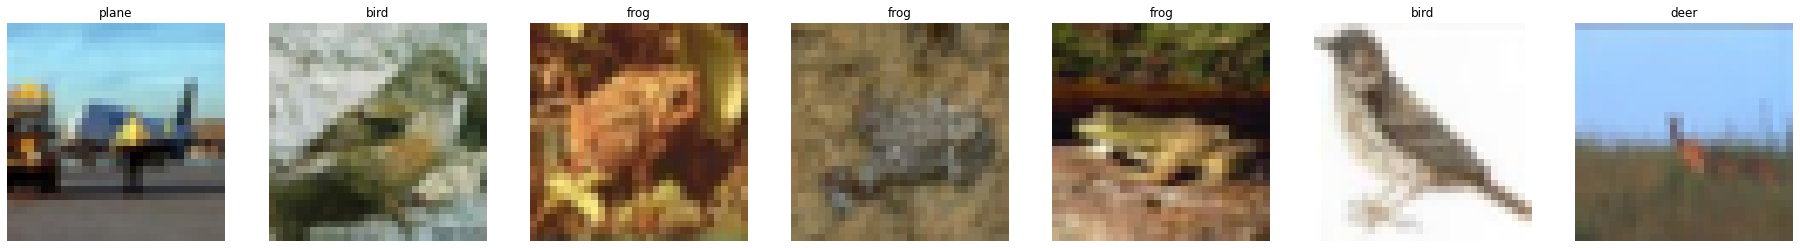

In [ ]:
# Visualizing some sample images
figure = plt.figure(figsize=(32, 32))
cols, rows = 7, 1
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(cifar_dataset), size=(1,)).item()
    img, label = cifar_dataset[sample_idx]
    img = (img/2)+0.5
    figure.add_subplot(rows, cols, i)
    plt.title(classes[label])
    plt.axis("off")
    plt.imshow(img.permute((1,2,0)))
plt.show()

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Create model architecture

GANs consist of two separate models: generator and discriminator. The generator will take random noise as input and output an image. The discriminator will take an image as input and predict whether its fake or real.

GANs are notoriously hard to train. Considering this, the authors make a few recommendations to make the training more tractable.
 - Initialize weights from N(0, 0.02)
 - Use Tanh as activation
 - Use ADAM as optimzer and set beta1=0.5

Use these recommendations when creating your model

## Train the model on Ciphar-10 images

For training, we have to train the two models alternatively to each other. The discriminators goal is to maxime the liklihood of correctly predicting between real and fake images. So, the overall goal of discriminator is to mamximize the following: 
$$log(D(x)) + log(1-D(G(z)))$$

The generators goal is to fool the discriminator such that it predicts its generated images as real. So, the goal of generator is to maximize the following:
$$log(D(G(z)))$$

### Generation through Condional GANs

generate and visualize some images using the generator